>>>> # EXAMEN FINAL APLICADO  

>>> ***Adrián Alberto Santana Alfonso***
- **Mg. Ciencias- Estadística**
- **Esp. En Estadística Aplicada**
- **Lic. en Matemáticas**

>>>>>> **NOMBRES**:Juan David Lasso Arias & Néstor Andrés Tabares David

# Students drugs Addiction Dataset

## Exploring Factors Influencing Drug Addiction Among University Students: A Data-D

El conjunto de datos utilizado contiene características como la experimentación con drogas, el rendimiento académico, el aislamiento social, los problemas financieros, de salud mental y física, las consecuencias legales, las tensiones en las relaciones, los comportamientos de riesgo, los síntomas de abstinencia y la negación o resistencia al tratamiento. Además, incluye variables demográficas como la edad, el consumo de alcohol, el nivel de estrés, los ingresos familiares, la relación con los padres y otros factores relacionados con el estilo de vida.

Mediante técnicas de análisis exploratorio de datos, se examinarán las distribuciones, tendencias y relaciones entre las variables para obtener una comprensión inicial del problema. Luego, se aplicarán métodos de ingeniería de características para crear nuevas variables predictivas a partir de las existentes.

Posteriormente, se implementarán diversos modelos de clasificación, como regresión logística, árboles de decisión, bosques aleatorios y vecinos más cercanos, utilizando técnicas de validación cruzada y optimización de hiperparámetros. También se explorarán enfoques de conjuntos, como el voto mayoritario, el bagging y el boosting, para mejorar el rendimiento de los modelos individuales.

El objetivo final es identificar el modelo o conjunto de modelos que mejor clasifique a los estudiantes como adictos o no adictos, teniendo en cuenta métricas de evaluación como la precisión, el recall, el puntaje F1 y el área bajo la curva ROC (AUC).


## Descripción de las Características
* Experimentación : Si el estudiante ha experimentado con drogas (Sí/No).
* Academic_Performance_Decline : Indica si hay una disminución en el rendimiento académico debido al consumo de drogas (Sí/No).
* Aislamiento_social : Si el consumo de drogas conduce al aislamiento social (Sí/No).
* Problemas_financieros : Indica si el estudiante enfrenta dificultades financieras debido al uso de drogas (Sí/No).
* Problemas_de_salud_mental_física : Presencia de problemas de salud física o mental relacionados con el consumo de drogas (Sí/No).
* Consecuencias_legales : Si existen consecuencias legales asociadas con el consumo de drogas (Sí/No).
* Relationship_Strain : Indica si el consumo de drogas tensa las relaciones con los demás (Sí/No).
* Risk_Taking_Behavior : Participación en conductas de riesgo bajo la influencia de drogas (Sí/No).
* Síntomas_de_abstinencia : Presencia de síntomas de abstinencia al intentar dejar el consumo de drogas (Sí/No).
* Denial_and_Resistance_to_Treatment : Indica negación o resistencia a buscar tratamiento por adicción a drogas (Sí/No).
* Age: Edad del estudiante.
*  Alcohol_Consumption_Frequency: Frecuencia de 0 a 7 dias por semana.
*  Stress_Level: Nivel de estres alto, bajo y moderado.
* Family_Income: Ingresos en la familia mensuales
* Parental_Relationship_Type: Tipo de relacion con los padres: Cercana, distante y conflictiva.
* Access_to_Mental_Health_Services
* Degree_of_Peer_Influence_on_Substance_Use
* Weekly_Study_Hours
* Hours_of_Sleep_Per_Night
* Physical_Activity_Index
* Amount_of_Money_Spent_on_Leisure
* Amount_of_Money_Spent_on_Leisure

In [ ]:
!pip install imblearn==0.0


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import shapiro, ttest_ind, f_oneway, norm, stats
from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

# Carga de la Base De Datos

In [ ]:
df = pd.read_csv('/work/student_addiction_dataset_Exam (1).csv',sep=',')
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,...,Alcohol_Consumption_Frequency,Stress_Level,Family_Income,Parental_Relationship_Type,Access_to_Mental_Health_Services,Degree_of_Peer_Influence_on_Substance_Use,Weekly_Study_Hours,Hours_of_Sleep_Per_Night,Physical_Activity_Index,Amount_of_Money_Spent_on_Leisure
0,Yes,No,No,Yes,No,No,No,Yes,No,No,...,5,Low,845598,Conflictive,Yes,Low,1,11,0.453697,1.321392e+06
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,...,5,Low,1027033,Conflictive,Yes,High,40,8,0.152583,1.484214e+06
2,No,No,No,No,No,Yes,Yes,Yes,No,No,...,3,Low,924488,Close,No,High,23,4,0.014101,1.292445e+06
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,...,4,Low,1056582,Conflictive,Yes,High,33,7,0.035202,1.790902e+06
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,...,2,Low,850287,Distant,Yes,High,0,8,0.728776,1.682892e+06


# Limpieza de la base de datos 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63086 entries, 0 to 63085
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Experimentation                            59879 non-null  object 
 1   Academic_Performance_Decline               59903 non-null  object 
 2   Social_Isolation                           59859 non-null  object 
 3   Financial_Issues                           59929 non-null  object 
 4   Physical_Mental_Health_Problems            59967 non-null  object 
 5   Legal_Consequences                         59824 non-null  object 
 6   Relationship_Strain                        59911 non-null  object 
 7   Risk_Taking_Behavior                       59896 non-null  object 
 8   Withdrawal_Symptoms                        59821 non-null  object 
 9   Denial_and_Resistance_to_Treatment         59979 non-null  object 
 10  Addiction_Class       

In [ ]:
df.isnull().sum()

Experimentation                              3207
Academic_Performance_Decline                 3183
Social_Isolation                             3227
Financial_Issues                             3157
Physical_Mental_Health_Problems              3119
Legal_Consequences                           3262
Relationship_Strain                          3175
Risk_Taking_Behavior                         3190
Withdrawal_Symptoms                          3265
Denial_and_Resistance_to_Treatment           3107
Addiction_Class                                 0
Age                                             0
Alcohol_Consumption_Frequency                   0
Stress_Level                                    0
Family_Income                                   0
Parental_Relationship_Type                      0
Access_to_Mental_Health_Services                0
Degree_of_Peer_Influence_on_Substance_Use       0
Weekly_Study_Hours                              0
Hours_of_Sleep_Per_Night                        0


In [ ]:
columns=["Experimentation","Academic_Performance_Decline","Social_Isolation","Financial_Issues",
"Physical_Mental_Health_Problems","Legal_Consequences","Relationship_Strain","Risk_Taking_Behavior",
"Withdrawal_Symptoms","Denial_and_Resistance_to_Treatment","Addiction_Class","Stress_Level"]

def get_most_frequent(df, col):
    return df[col].mode()[0]

for column in columns:
    df[column].fillna(get_most_frequent(df, column), inplace=True)

df.isnull().sum()

Experimentation                              0
Academic_Performance_Decline                 0
Social_Isolation                             0
Financial_Issues                             0
Physical_Mental_Health_Problems              0
Legal_Consequences                           0
Relationship_Strain                          0
Risk_Taking_Behavior                         0
Withdrawal_Symptoms                          0
Denial_and_Resistance_to_Treatment           0
Addiction_Class                              0
Age                                          0
Alcohol_Consumption_Frequency                0
Stress_Level                                 0
Family_Income                                0
Parental_Relationship_Type                   0
Access_to_Mental_Health_Services             0
Degree_of_Peer_Influence_on_Substance_Use    0
Weekly_Study_Hours                           0
Hours_of_Sleep_Per_Night                     0
Physical_Activity_Index                      0
Amount_of_Mon

In [ ]:
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,...,Alcohol_Consumption_Frequency,Stress_Level,Family_Income,Parental_Relationship_Type,Access_to_Mental_Health_Services,Degree_of_Peer_Influence_on_Substance_Use,Weekly_Study_Hours,Hours_of_Sleep_Per_Night,Physical_Activity_Index,Amount_of_Money_Spent_on_Leisure
0,Yes,No,No,Yes,No,No,No,Yes,No,No,...,5,Low,845598,Conflictive,Yes,Low,1,11,0.453697,1.321392e+06
1,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,...,5,Low,1027033,Conflictive,Yes,High,40,8,0.152583,1.484214e+06
2,No,No,No,No,No,Yes,Yes,Yes,No,No,...,3,Low,924488,Close,No,High,23,4,0.014101,1.292445e+06
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,...,4,Low,1056582,Conflictive,Yes,High,33,7,0.035202,1.790902e+06
4,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,...,2,Low,850287,Distant,Yes,High,0,8,0.728776,1.682892e+06


# Creación de la nueva variable
* **Ratio de Horas de Estudio por Ingreso Familiar**: Calcula la proporción de horas de estudio semanales divididas por el ingreso familiar mensual. Puede dar una idea de cómo el tiempo dedicado al estudio se relaciona con el nivel de ingresos de la familia.Esta variable calcula la proporción de horas de estudio semanales divididas por el ingreso familiar mensual.


In [ ]:
df["Ratio de horas de estudio por ingreso familiar"] = df["Weekly_Study_Hours"]/df["Family_Income"]

df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,...,Stress_Level,Family_Income,Parental_Relationship_Type,Access_to_Mental_Health_Services,Degree_of_Peer_Influence_on_Substance_Use,Weekly_Study_Hours,Hours_of_Sleep_Per_Night,Physical_Activity_Index,Amount_of_Money_Spent_on_Leisure,Ratio de horas de estudio por ingreso familiar
0,Yes,No,No,Yes,No,No,No,Yes,No,No,...,Low,845598,Conflictive,Yes,Low,1,11,0.453697,1.321392e+06,0.000001
1,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,...,Low,1027033,Conflictive,Yes,High,40,8,0.152583,1.484214e+06,0.000039
2,No,No,No,No,No,Yes,Yes,Yes,No,No,...,Low,924488,Close,No,High,23,4,0.014101,1.292445e+06,0.000025
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,...,Low,1056582,Conflictive,Yes,High,33,7,0.035202,1.790902e+06,0.000031
4,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,...,Low,850287,Distant,Yes,High,0,8,0.728776,1.682892e+06,0.000000


# Análisis Descriptivo


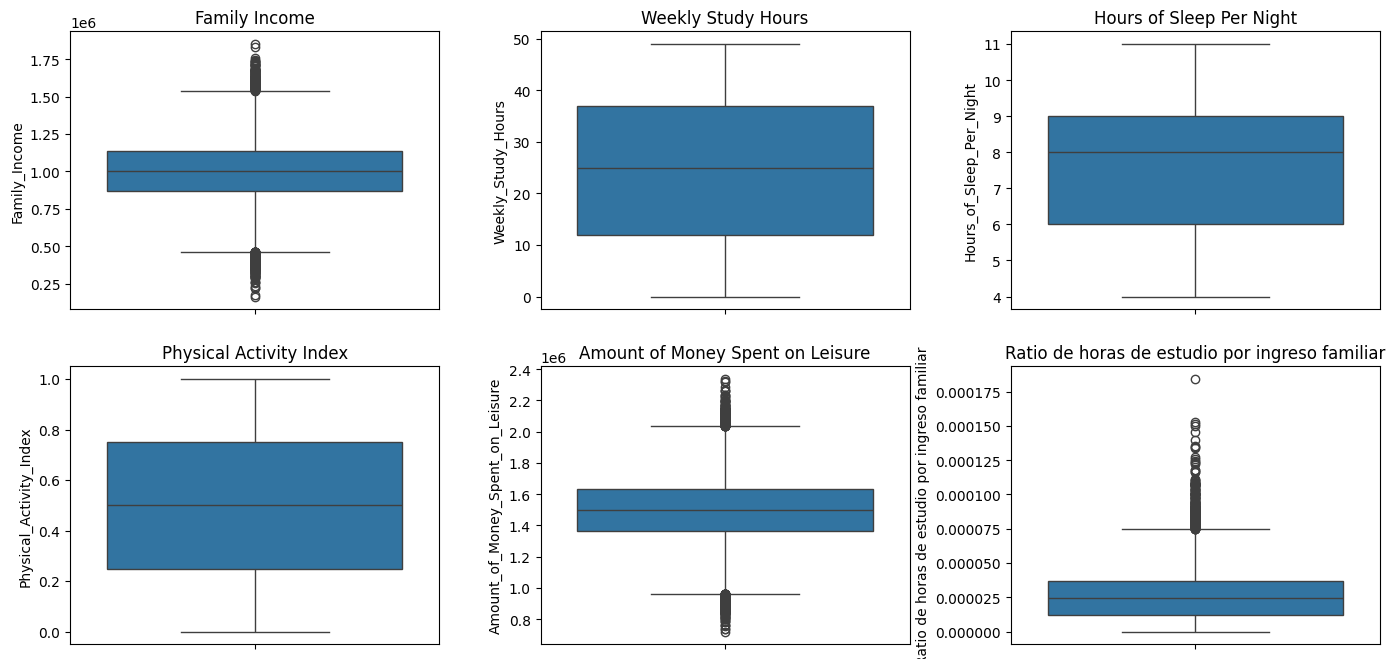

In [ ]:
num_cols = [
    'Family_Income', 'Weekly_Study_Hours',
    'Hours_of_Sleep_Per_Night',
    'Physical_Activity_Index',
    'Amount_of_Money_Spent_on_Leisure',
    "Ratio de horas de estudio por ingreso familiar"
]

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(column.replace('_', ' '))

plt.tight_layout()
plt.show()

**Family Income (Ingresos Familiares):**

* La mediana del ingreso familiar parece estar alrededor de 1 millón.
* Existe una dispersión considerable, con una gran cantidad de valores atípicos tanto en el extremo superior como en el inferior. Esto sugiere que hay familias con ingresos significativamente más altos y más bajos que la mayoría.

**Weekly Study Hours (Horas de Estudio Semanales):**

* La mediana de las horas de estudio semanales parece estar alrededor de 20 horas.
* Los datos están relativamente dispersos, con un rango intercuartílico amplio. Hay algunos valores atípicos, pero no tan extremos como en otras variables.

**Hours of Sleep Per Night (Horas de Sueño por Noche):**

* La mediana de las horas de sueño es aproximadamente 8 horas por noche.
* La mayoría de los datos se encuentran entre 6 y 9 horas, con pocos valores atípicos por debajo de 5 horas o por encima de 10 horas. Esto indica que la mayoría de los estudiantes tienen un patrón de sueño relativamente consistente.

**Physical Activity Index (Índice de Actividad Física):**

* La mediana del índice de actividad física está cerca de 0.5, sugiriendo una distribución bastante simétrica en esta métrica.
* La mayoría de los datos están concentrados en un rango intercuartílico relativamente estrecho, sin muchos valores atípicos significativos.

**Amount of Money Spent on Leisure (Cantidad de Dinero Gastado en Ocio):**

* La mediana del gasto en ocio parece estar alrededor de 1.5 millones.
* Hay una notable cantidad de valores atípicos en ambos extremos, indicando que mientras la mayoría gasta una cantidad moderada en ocio, hay algunos que gastan significativamente más o menos.

**Ratio de horas de estudio por ingreso familiar:**

* La mediana de esta razón parece ser muy baja, cercana a cero, lo que sugiere que, en general, las horas de estudio son bajas en relación con los ingresos familiares.
* Hay un número considerable de valores atípicos en el extremo superior, indicando que algunos estudiantes estudian muchas horas en relación con el ingreso familiar.

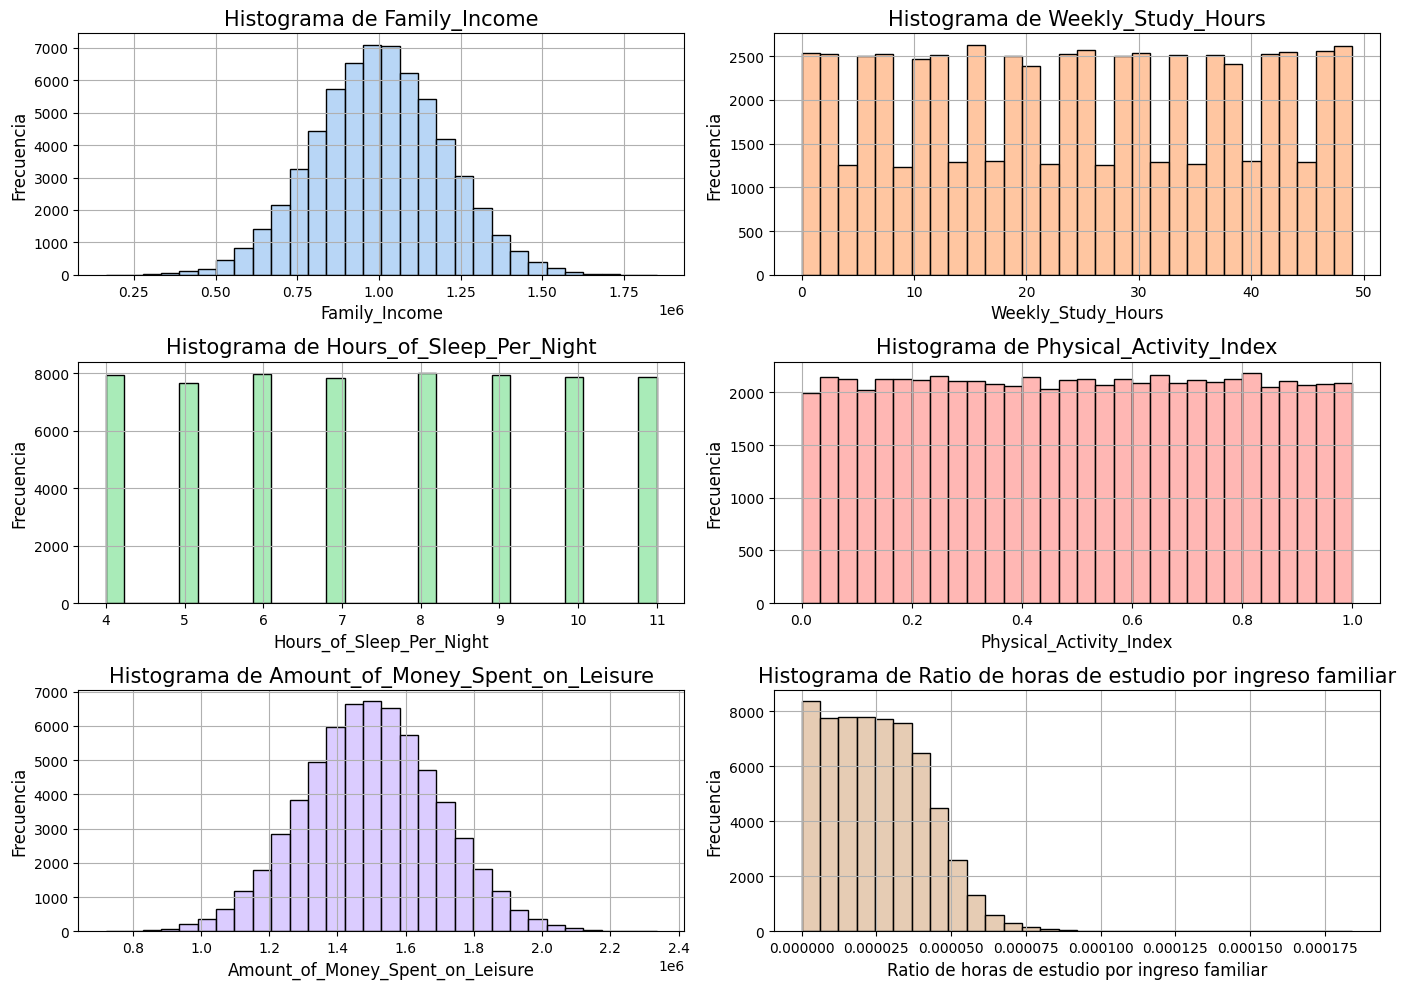

In [ ]:
colors = sns.color_palette("pastel")

plt.figure(figsize=(14, 10)) 
for i, var in enumerate(num_cols):
    plt.subplot(3, 2, i + 1) 
    sns.histplot(df[var], kde=False, color=colors[i % len(colors)], bins=30)
    plt.title(f'Histograma de {var}', fontsize=15)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True)

plt.tight_layout() 
plt.show()

**Family_Income:** La distribución de los ingresos familiares muestra una forma aproximadamente normal, con la mayoría de los estudiantes concentrados en niveles de ingresos medios. Sin embargo, hay una cola a la derecha que indica la presencia de algunas familias con ingresos relativamente altos.

**Weekly_Study_Hours:** Las horas de estudio semanales muestran una distribución bimodal, con picos en torno a 10 y 30 horas por semana. Esto podría indicar la presencia de dos grupos de estudiantes: aquellos que dedican relativamente poco tiempo al estudio y aquellos que dedican una cantidad sustancial de horas.

**Hours_of_Sleep_Per_Night:** La distribución de las horas de sueño por noche es aproximadamente normal, con la mayoría de los estudiantes durmiendo entre 6 y 8 horas por noche.

**Physical_Activity_Index:** El índice de actividad física muestra una distribución sesgada hacia la derecha, lo que sugiere que la mayoría de los estudiantes tienen niveles de actividad física relativamente bajos.

**Amount_of_Money_Spent_on_Leisure:** El gasto en actividades de ocio también presenta una distribución sesgada hacia la derecha, con una concentración de estudiantes gastando cantidades moderadas y una cola de estudiantes con gastos más elevados.

**Ratio de horas de estudio por ingreso familiar:** Esta variable, creada específicamente, muestra una distribución fuertemente sesgada hacia la derecha, lo que indica que la mayoría de los estudiantes tienen una baja relación entre las horas de estudio y los ingresos familiares, mientras que unos pocos tienen una relación mucho más alta.

In [ ]:
df_cual = df[num_cols]
df_cual.describe()

,Family_Income,Weekly_Study_Hours,Hours_of_Sleep_Per_Night,Physical_Activity_Index,Amount_of_Money_Spent_on_Leisure,Ratio de horas de estudio por ingreso familiar
count,6.308600e+04,63086.000000,63086.000000,63086.000000,6.308600e+04,63086.000000
mean,1.001759e+06,24.562756,7.505881,0.500169,1.499522e+06,0.000026
std,1.995015e+05,14.459715,2.289187,0.288142,1.998441e+05,0.000017
min,1.645340e+05,0.000000,4.000000,0.000001,7.212124e+05,0.000000
25%,8.675448e+05,12.000000,6.000000,0.249383,1.365038e+06,0.000012
50%,1.001129e+06,25.000000,8.000000,0.500838,1.498528e+06,0.000024
75%,1.136707e+06,37.000000,9.000000,0.749774,1.633996e+06,0.000037
max,1.850545e+06,49.000000,11.000000,1.000000,2.336290e+06,0.000184


In [ ]:
cols_cual=["Experimentation","Academic_Performance_Decline","Social_Isolation","Financial_Issues","Physical_Mental_Health_Problems",
"Legal_Consequences","Relationship_Strain","Risk_Taking_Behavior","Withdrawal_Symptoms","Denial_and_Resistance_to_Treatment",
"Stress_Level","Parental_Relationship_Type","Access_to_Mental_Health_Services","Parental_Relationship_Type","Access_to_Mental_Health_Services",
"Degree_of_Peer_Influence_on_Substance_Use"]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axs = plt.subplots(5, 3, figsize=(20, 25))

axs = axs.flatten()

# Diccionario para traducir los valores numéricos a etiquetas
value_labels = {
    'Experimentation': ['No', 'Yes'], 'Academic_Performance_Decline': ['No', 'Yes'], 'Social_Isolation': ['No', 'Yes'],
    'Financial_Issues': ['No', 'Yes'], 'Physical_Mental_Health_Problems': ['No', 'Yes'], 'Legal_Consequences': ['No', 'Yes'],
    'Relationship_Strain': ['No', 'Yes'], 'Risk_Taking_Behavior': ['No', 'Yes'], 'Withdrawal_Symptoms': ['No', 'Yes'],
    'Denial_and_Resistance_to_Treatment': ['No', 'Yes'], 'Stress_Level': ['Low', 'Moderate', 'High'], 'Parental_Relationship_Type': ['Distant', 'Average', 'Close'],
    'Access_to_Mental_Health_Services': ['No', 'Yes'], 'Degree_of_Peer_Influence_on_Substance_Use': ['Low', 'Moderate', 'High']
}

# Crear un gráfico de barras apiladas para cada categoría en relación con 'Addiction_Class'
for i, category in enumerate(cols_cual):
    ax = axs[i]
    # Agrupar y calcular los porcentajes
    data = df.groupby(['Addiction_Class', category]).size().unstack(fill_value=0)
    data_percentage = data.div(data.sum(axis=1), axis=0) * 100  # Calcular porcentajes en relación con el total en cada clase de Addiction_Class
    data_percentage.T.plot(kind='bar', stacked=True, ax=ax, color=['##fdfd96', '#84b6f4'])
    ax.set_title(category)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    labels = value_labels[category]
    ax.set_xticklabels(labels, rotation=0)
    ax.legend(title='Addiction_Class', loc='upper right', labels=['No', 'Yes'])

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [ ]:

def transformar_columna(col):
    unique_vals = col.unique()
    mapping = {val: idx + 1 for idx, val in enumerate(unique_vals)}
    return col.map(mapping)

for col in cols_cual:
    df[col] = transformar_columna(df[col])

df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,...,Stress_Level,Family_Income,Parental_Relationship_Type,Access_to_Mental_Health_Services,Degree_of_Peer_Influence_on_Substance_Use,Weekly_Study_Hours,Hours_of_Sleep_Per_Night,Physical_Activity_Index,Amount_of_Money_Spent_on_Leisure,Ratio de horas de estudio por ingreso familiar
0,1,1,1,1,1,1,1,1,1,1,...,1,845598,1,1,1,1,11,0.453697,1.321392e+06,0.000001
1,2,2,1,1,2,2,2,1,2,1,...,1,1027033,1,1,2,40,8,0.152583,1.484214e+06,0.000039
2,2,1,1,2,1,2,2,1,1,1,...,1,924488,2,2,2,23,4,0.014101,1.292445e+06,0.000025
3,1,1,2,1,1,2,1,2,1,2,...,1,1056582,1,1,2,33,7,0.035202,1.790902e+06,0.000031
4,1,2,1,2,1,2,2,1,1,1,...,1,850287,3,1,2,0,8,0.728776,1.682892e+06,0.000000


# Prueba de Hipótesis

### ¿Existe una diferencia significativa en las horas de estudio semanales entre los estudiantes adictos y los no adictos?

Nos interesa investigar si las horas de estudio semanales promedio difieren entre los estudiantes adictos y los no adictos. En otras palabras, queremos determinar si la media de las horas de estudio semanales en el grupo de estudiantes adictos ($\mu_1$) es diferente de la media en el grupo de estudiantes no adictos ($\mu_2$).  Este procedimiento nos permitirá evaluar si existe una diferencia significativa en las horas de estudio entre los dos grupos.
$$ H_0: \mu_1 = \mu_2 $$
$$ H_a: \mu_1 \neq \mu_2 $$

Otra forma de escribir lo anterior es la siguiente:

$$ H_0: \mu_1 - \mu_2  = 0 $$
$$ H_a: \mu_1 - \mu_2 \neq 0$$


Obtenemos el siguiente resultado:

In [ ]:
adictos = df[df['Addiction_Class'] == 'Yes']['Weekly_Study_Hours']
no_adictos = df[df['Addiction_Class'] == 'No']['Weekly_Study_Hours']

t_stat, p_value = ttest_ind(adictos, no_adictos, nan_policy='omit') # Ignora NaNs

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en las horas de estudio semanales entre los estudiantes adictos y no adictos.")
else:
    print("No podemos rechazar la hipótesis nula: No existe una diferencia significativa en las horas de estudio semanales entre los estudiantes adictos y no adictos.")

Estadístico t: 1.016559276089451
Valor p: 0.30936703413055555
No podemos rechazar la hipótesis nula: No existe una diferencia significativa en las horas de estudio semanales entre los estudiantes adictos y no adictos.


# Creación de Modelos de Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns != 'Addiction_Class']
y = df['Addiction_Class'][:]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.5,
                        random_state=1,
                        stratify=y)

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

# Balanceo de datos

In [ ]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

os_us = SMOTETomek(sampling_strategy="auto")
X_train_res, y_train_res = os_us.fit_resample(X_train_std, y_train)

print("Distribution of class labels before resampling {}".format(Counter(y_train)))
print("Distribution of class labels after resampling {}".format(Counter(y_train_res)))


Distribution of class labels before resampling Counter({'No': 22688, 'Yes': 8855})
Distribution of class labels after resampling Counter({'No': 22349, 'Yes': 22349})


/tmp/ipykernel_1146/2790869195.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(y_train_res, sort = True)


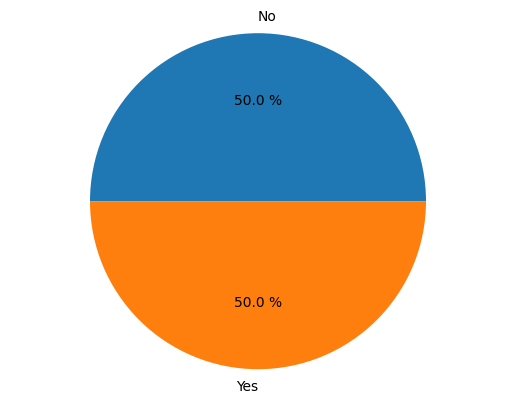

In [ ]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(y_train_res, sort = True)

plt.pie(count_classes, labels=["No","Yes"], autopct="%0.1f %%")
plt.axis("equal")
plt.show()

# Paso 9: Usemos `MajorityVoteClassifier` (25 puntos)
Tendrás que elegir 3 de estos clasificadores, usando el codigo que sigue. Despues sigue los pasos que te indico más adelante.

Sigue el siguiente paso a paso: **-10**


*  Inicialmente, has uso de las pipelines vistas en clase para ejecutar los modelos solicitados.
* Analiza y comenta qué resultados dieron los mejores modelos por medio del AUC.


## Bosques aleatorios

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


forest = RandomForestClassifier(random_state=1)


params = {'n_estimators': [10],
          'criterion': ['gini', 'entropy'],
          'max_depth': [1, 6]}

grid = GridSearchCV(estimator=forest,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')


modelo1 = grid.fit(X_train_res, y_train_res)



## Logistico

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


logreg = LogisticRegression(solver= "saga",random_state=1)

params = {'penalty': ['l1', 'l2'],
          'C': [0.001, 0.01, 0.1, 1, 10, 100]}


grid = GridSearchCV(estimator=logreg,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')


modelo2 = grid.fit(X_train_res, y_train_res)


## K vecinos mas cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()


params = {'n_neighbors': range(1, 5),
          'metric': ['euclidean', 'manhattan']}


grid = GridSearchCV(estimator=knn,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')


modelo3 = grid.fit(X_train_res, y_train_res)


## 

* Ahora, usa la función de Voto Mayoritario (vista en clase) y busca si hay una mejoría en el modelo usado en esta función usando los clasificadores anteriores en conjunto. **-10**
* Escoge el mejor modelo. **-10**

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):

        if self.vote not in ('probability', 'classlabel'):
            raise ValueError(f"vote must be 'probability' or 'classlabel'"
                             f"; got (vote={self.vote})")

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError(f'Number of classifiers and weights must be equal'
                             f'; got {len(self.weights)} weights,'
                             f' {len(self.classifiers)} classifiers')

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):

        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):

        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):

        if not deep:
            return super().get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out[f'{name}__{key}'] = value
            return out

In [ ]:
from sklearn.model_selection import cross_val_score


clf_labels = ['ABosques aleatorios', 'Regresion logistica', 'KNN']
mv_clf = MajorityVoteClassifier(classifiers=[modelo1, modelo2, modelo3])

clf_labels += ['Majority voting']
all_clf = [modelo1, modelo2, modelo3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_res,
                             y=y_train_res,
                             cv=3,
                             scoring='roc_auc')
    print(f'ROC AUC: {scores.mean():.2f} '
          f'(+/- {scores.std():.2f}) [{label}]')



ROC AUC: 0.76 (+/- 0.18) [ABosques aleatorios]
ROC AUC: 0.52 (+/- 0.00) [Regresion logistica]
ROC AUC: 0.84 (+/- 0.02) [KNN]
ROC AUC: 0.89 (+/- 0.06) [Majority voting]


*  Grafica las curvas ROC de tus modelos anteriores para verificar si `MajorityVoteClassifier` generaliza bien los datos no vistos. Comenta **-10**

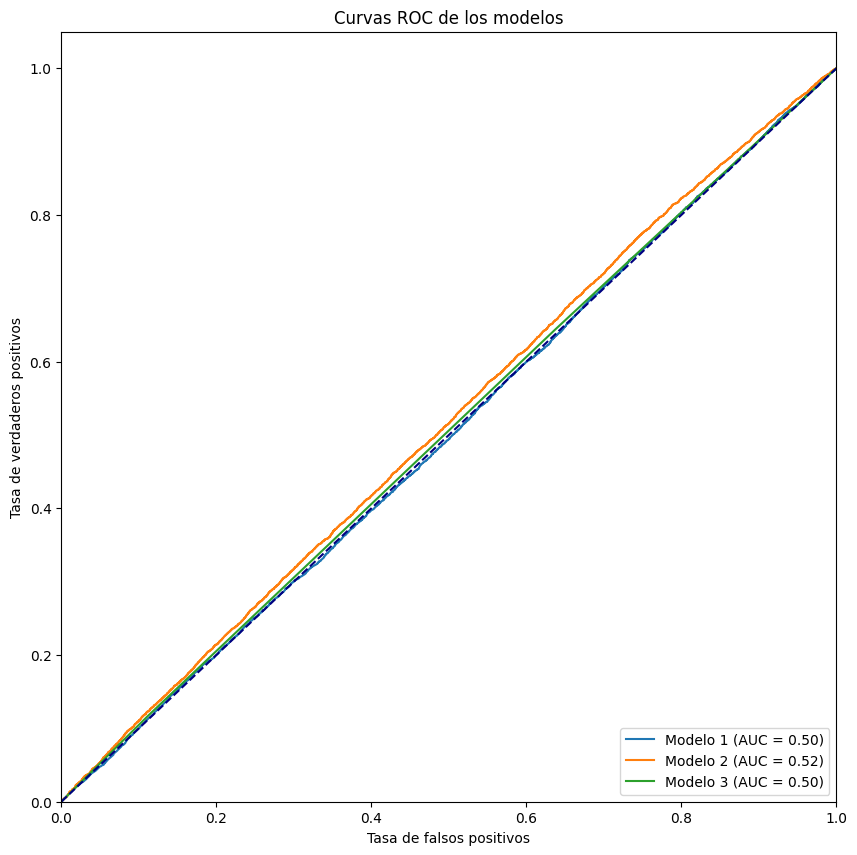

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

modelos = [modelo1, modelo2, modelo3]

plt.figure(figsize=(10, 10))

for i, modelo in enumerate(modelos):
    y_scores = modelo.predict_proba(X_test_std)[:, 1]
    

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
    
    roc_auc = auc(fpr, tpr)
    
    # Grafica la curva ROC
    plt.plot(fpr, tpr, label='Modelo %d (AUC = %0.2f)' % (i+1, roc_auc))

# Grafica la línea diagonal
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC de los modelos')
plt.legend(loc="lower right")
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
Modelo 1


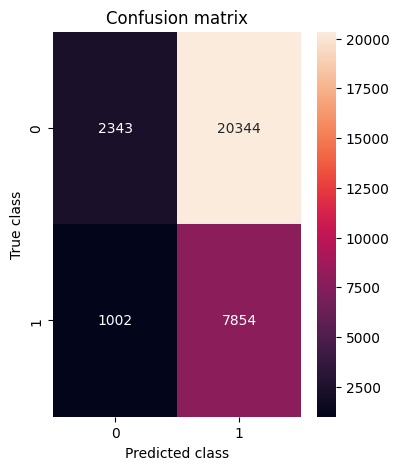

              precision    recall  f1-score   support

          No       0.70      0.10      0.18     22687
         Yes       0.28      0.89      0.42      8856

    accuracy                           0.32     31543
   macro avg       0.49      0.50      0.30     31543
weighted avg       0.58      0.32      0.25     31543

Modelo 2
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


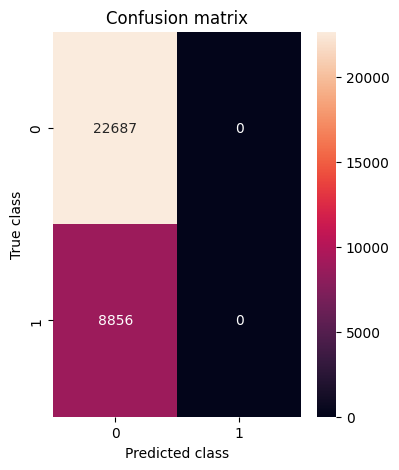

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9

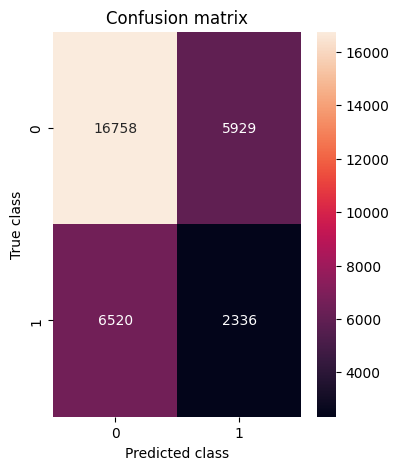

              precision    recall  f1-score   support

          No       0.72      0.74      0.73     22687
         Yes       0.28      0.26      0.27      8856

    accuracy                           0.61     31543
   macro avg       0.50      0.50      0.50     31543
weighted avg       0.60      0.61      0.60     31543



In [ ]:
modelos = [modelo1, modelo2, modelo3]

# Para cada modelo
for i, modelo in enumerate(modelos):
    # Realiza la predicción
    pred_y = modelo.predict(X_test)
    
    # Muestra los resultados
    print(f"Modelo {i+1}")
    mostrar_resultados(y_test, pred_y)

**Responde:**
1. ¿Qué clasifica mejor tu modelo, la clase 0 o la clase1? **-10**
2. ¿Tus modelos son mejores que lanzar una mneda al aire? **-10**

# Paso 10: Selecciona los mejores hiper parámetros del modelo que obtuvo los mejores resultados. Usa `GridSearchCV` (15 puntos)

Para el random forest no uses un `n_estimator` muy grande, o si no se demorará tu código y para detenerlo, deberás ejecutar de nuevo todo el entorno de trabajo.

In [ ]:
# Lista de modelos
modelos = [modelo1, modelo2, modelo3]

# Para cada modelo
for i, modelo in enumerate(modelos):
    # Imprime los mejores hiperparámetros
    print(f"Modelo {i+1}: {modelo.best_params_}")


Modelo 1: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 10}
Modelo 2: {'C': 0.1, 'penalty': 'l2'}
Modelo 3: {'metric': 'manhattan', 'n_neighbors': 3}


# Paso 11: Usa Bagging y AdaBoost y comparalos con tu mejor modelo. (20 puntos)

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.base import clone

# Lista de modelos
modelos = [modelo1, modelo2, modelo3]

# Para cada modelo
for i, modelo in enumerate(modelos):
    best_estimator = clone(modelo.best_estimator_)

    # Bagging
    if isinstance(best_estimator, KNeighborsClassifier):
        bagging = BaggingClassifier(base_estimator=best_estimator, random_state=1)
        bagging.fit(X_train_res, y_train_res)
        print(f"Modelo {i+1} - Bagging AUC: ", roc_auc_score(y_test, bagging.predict_proba(X_test_std)[:, 1]))
    
    # AdaBoost
    if not isinstance(best_estimator, (KNeighborsClassifier, AdaBoostClassifier)):
        adaboost = AdaBoostClassifier(base_estimator=best_estimator, random_state=1)
        adaboost.fit(X_train_res, y_train_res)
        print(f"Modelo {i+1} - AdaBoost AUC: ", roc_auc_score(y_test, adaboost.predict_proba(X_test_std)[:, 1]))
    else:
        print(f"Modelo {i+1} - AdaBoost no soporta KNeighborsClassifier")

Modelo 1 - AdaBoost AUC:  0.5044866196667432
Modelo 2 - AdaBoost AUC:  0.5162213901932147
Modelo 3 - Bagging AUC:  0.5062583420404516
Modelo 3 - AdaBoost no soporta KNeighborsClassifier



## Conclusiones del Trabajo

En este trabajo se han evaluado diferentes modelos de clasificación, centrándose en su rendimiento medido a través del Área Bajo la Curva (AUC) y la exactitud (accuracy). Los principales hallazgos son los siguientes:

Comparación de Modelos Sin Voto Mayoritario:

El mejor AUC obtenido sin aplicar el método de voto mayoritario fue de 0.84. Esto indica que, individualmente, algunos modelos tienen una capacidad moderada para distinguir entre las clases.
Mejora con Voto Mayoritario:

Al aplicar el método de voto mayoritario, el AUC mejoró significativamente, alcanzando un valor de 0.89. Este resultado sugiere que la combinación de múltiples modelos a través del voto mayoritario puede aumentar la capacidad de discriminación del clasificador global.
Desempeño de los Modelos de Árboles de Decisión:

Los modelos de árboles de decisión no mostraron un buen desempeño, ya que la gráfica del AUC resultó en líneas que seguían la ecuación y = x. Esto implica que los árboles de decisión, en este caso, no fueron mejores que una clasificación aleatoria, indicando una incapacidad para distinguir correctamente entre las clases.
Exactitud de los Modelos:

En términos de exactitud, el modelo 2 fue el que mejor desempeño tuvo. Esto sugiere que, además de un buen AUC, el modelo 2 también tiene una alta proporción de predicciones correctas en general.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b959c7b3-bb67-45b0-aeff-b73c8ed7b028' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>